In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Dataset link - https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
feature_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for column in feature_columns:
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column]==0])}\n")

Pregnancies ==> Missing zeros : 111

Glucose ==> Missing zeros : 5

BloodPressure ==> Missing zeros : 35

SkinThickness ==> Missing zeros : 227

Insulin ==> Missing zeros : 374

BMI ==> Missing zeros : 11

DiabetesPedigreeFunction ==> Missing zeros : 0

Age ==> Missing zeros : 0



In [9]:
fill_values=SimpleImputer(missing_values=0,strategy="mean",copy=False)
df[feature_columns]=fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column]==0])}\n")

Pregnancies ==> Missing zeros : 0

Glucose ==> Missing zeros : 0

BloodPressure ==> Missing zeros : 0

SkinThickness ==> Missing zeros : 0

Insulin ==> Missing zeros : 0

BMI ==> Missing zeros : 0

DiabetesPedigreeFunction ==> Missing zeros : 0

Age ==> Missing zeros : 0



In [10]:
x=df[feature_columns]
y=df.Outcome

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
def evaluate(model,x_train,x_test,y_train,y_test):
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)

    print('TRAINING RESULTS:\n********************')
    clf_report=pd.DataFrame(classification_report(y_train,y_train_pred,output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train,y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train,y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print('\nTESTING RESULTS:\n********************')
    clf_report=pd.DataFrame(classification_report(y_test,y_test_pred,output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test,y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test,y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [12]:
tree=DecisionTreeClassifier()
bagging_clf=BaggingClassifier(base_estimator=tree,n_estimators=1500,random_state=42)
bagging_clf.fit(x_train,y_train)
evaluate(bagging_clf,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE: 0.7576
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.64      0.76       0.73          0.76
recall      0.79  0.70      0.76       0.74          0.76
f1-score    0.81  0.67      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [13]:
scores={
    'BaggingClassifier':{
        'Train':accuracy_score(y_train,bagging_clf.predict(x_train)),
        'Test':accuracy_score(y_test,bagging_clf.predict(x_test))
    }
}

In [14]:
rf_clf=RandomForestClassifier(random_state=42,n_estimators=1000)
rf_clf.fit(x_train,y_train)
evaluate(rf_clf,x_train,x_test,y_train,y_test)

TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE: 0.7532
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.81  0.65      0.75       0.73          0.75
recall      0.81  0.64      0.75       0.73          0.75
f1-score    0.81  0.64      0.75       0.73          0.75
support   151.00 80.00      0.75     231.00        231.00


In [15]:
scores['Random Forest']={
    'Train':accuracy_score(y_train,rf_clf.predict(x_train)),
    'Test':accuracy_score(y_test,rf_clf.predict(x_test))
}

In [16]:
ex_tree_clf=ExtraTreesClassifier(n_estimators=1000,max_features=7,random_state=42)
ex_tree_clf.fit(x_train,y_train)
evaluate(ex_tree_clf,x_train,x_test,y_train,y_test)

TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[124  27]
 [ 25  55]]
ACCURACY SCORE: 0.7749
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.67      0.77       0.75          0.78
recall      0.82  0.69      0.77       0.75          0.77
f1-score    0.83  0.68      0.77       0.75          0.78
support   151.00 80.00      0.77     231.00        231.00


In [17]:
scores['Extra Tree']={
    'Train':accuracy_score(y_train,ex_tree_clf.predict(x_train)),
    'Test':accuracy_score(y_test,ex_tree_clf.predict(x_test))
}

In [18]:
ada_boost_clf=AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(x_train,y_train)
evaluate(ada_boost_clf,x_train,x_test,y_train,y_test)

TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE: 0.8324
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.83       0.82          0.83
recall      0.89   0.73      0.83       0.81          0.83
f1-score    0.87   0.75      0.83       0.81          0.83
support   349.00 188.00      0.83     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE: 0.7619
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.65      0.76       0.74          0.76
recall      0.81  0.66      0.76       0.74          0.76
f1-score    0.82  0.66      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [19]:
scores['AdaBoost']={
    'Train':accuracy_score(y_train,ada_boost_clf.predict(x_train)),
    'Test':accuracy_score(y_test,ada_boost_clf.predict(x_test))
}

In [20]:
grad_boost_clf=GradientBoostingClassifier(n_estimators=100,random_state=42)
grad_boost_clf.fit(x_train,y_train)
evaluate(grad_boost_clf,x_train,x_test,y_train,y_test)

TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE: 0.9516
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96      0.95       0.95          0.95
recall      0.98   0.90      0.95       0.94          0.95
f1-score    0.96   0.93      0.95       0.95          0.95
support   349.00 188.00      0.95     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE: 0.7359
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.61      0.74       0.71          0.74
recall      0.77  0.68      0.74       0.72          0.74
f1-score    0.79  0.64      0.74       0.72          0.74
support   151.00 80.00      0.74     231.00        231.00


In [21]:
scores['Gradient Boosting']={
    'Train':accuracy_score(y_train,grad_boost_clf.predict(x_train)),
    'Test':accuracy_score(y_test,grad_boost_clf.predict(x_test))
}

In [22]:
estimators=[]
lod_reg=LogisticRegression(solver='liblinear')
estimators.append(('Logistic',lod_reg))

tree=DecisionTreeClassifier()
estimators.append(('Tree',tree))

svm_clf=SVC(gamma='scale')
estimators.append(('SVM',svm_clf))

voting=VotingClassifier(estimators=estimators)
voting.fit(x_train,y_train)

evaluate(voting,x_train,x_test,y_train,y_test)

TRAINING RESULTS:
********************
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE: 0.8063
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.94   0.56      0.81       0.75          0.81
f1-score    0.86   0.67      0.81       0.77          0.80
support   349.00 188.00      0.81     537.00        537.00

TESTING RESULTS:
********************
CONFUSION MATRIX:
[[129  22]
 [ 38  42]]
ACCURACY SCORE: 0.7403
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.77  0.66      0.74       0.71          0.73
recall      0.85  0.53      0.74       0.69          0.74
f1-score    0.81  0.58      0.74       0.70          0.73
support   151.00 80.00      0.74     231.00        231.00


In [23]:
scores['Voting']={
    'Train':accuracy_score(y_train,voting.predict(x_train)),
    'Test':accuracy_score(y_test,voting.predict(x_test))
}

<Axes: >

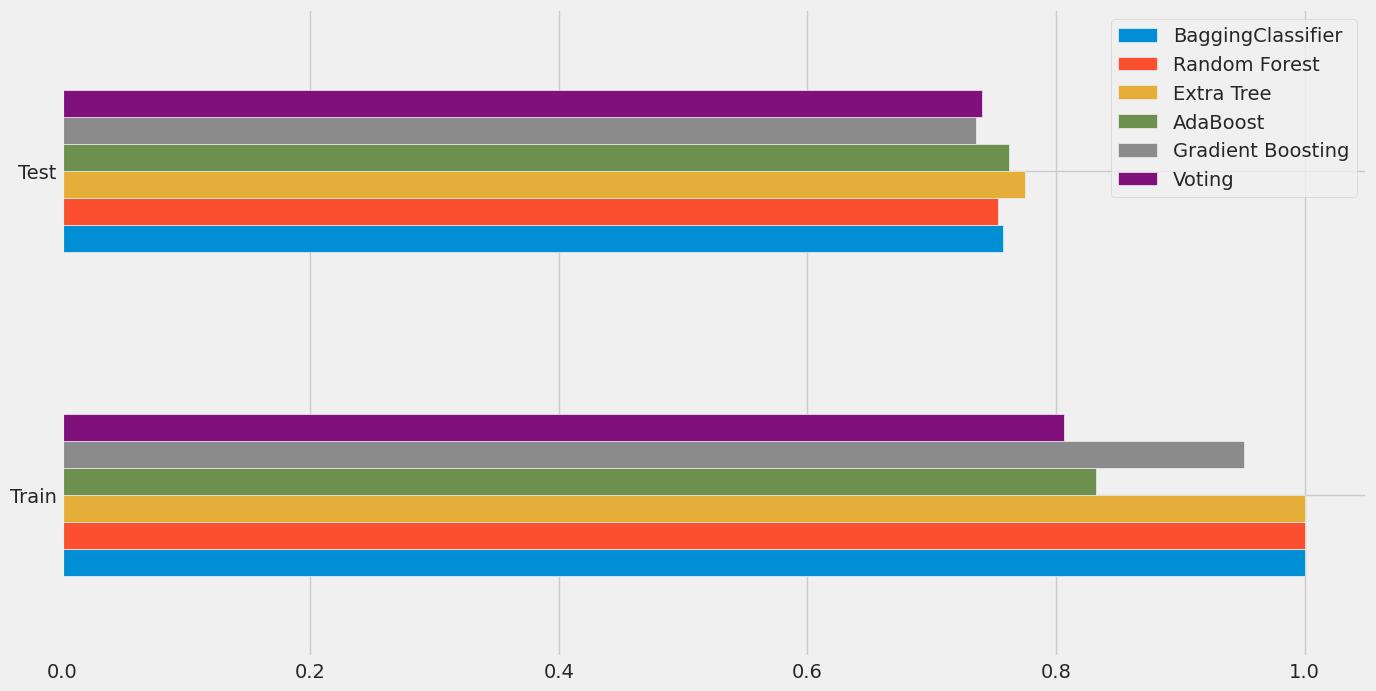

In [24]:
scores_df=pd.DataFrame(scores)
scores_df.plot(kind='barh',figsize=(15,8))